In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.dirname(sys.path[0])) # Este comando hace que el notebook sea la ruta principal y poder trabajar en cascada


In [2]:
from utils.funcion import *

In [3]:
fifa = pd.read_csv('src/data/processed/fifa24.csv',)

In [4]:
fifa_gk = pd.read_csv('src/data/processed/fifa_gk.csv')

In [5]:
fifa.head()

,Name,Age,Height,Weight,Overall,Potential,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,L. Messi,35,169,67,91,91,4,4,81,89,...,0,0,0,0,0,0,0,0,0,0
1,K. Benzema,34,185,81,91,91,4,4,80,88,...,0,0,0,0,0,0,0,0,0,0
2,R. Lewandowski,33,185,81,91,91,4,4,75,91,...,0,0,0,0,0,0,0,0,0,1
3,K. De Bruyne,31,181,70,91,91,5,4,74,88,...,1,0,0,0,0,0,0,0,0,0
4,K. Mbappé,23,182,73,91,95,4,5,97,89,...,0,0,0,0,0,0,0,0,0,1


In [6]:
fifa['Overall'].mean()

65.96615140221176

In [7]:
fifa['Overall'].median()

66.0

In [8]:
fifa['Overall'].max()

91

In [9]:
fifa['Overall'].min()

47

In [10]:
fifa['Overall'].isnull().sum()

0

In [11]:
# Calcular la media del valor de 'Overall'
media_overall = fifa['Overall'].mean()

# Asignar clasificación de habilidad basada en la media
fifa['Clasificación Habilidad'] = np.where(fifa['Overall'] < media_overall, 'Baja', 'Alta')

# Mostrar el DataFrame con las columnas 'Overall' y 'Clasificación Habilidad'
print(fifa[['Overall', 'Clasificación Habilidad']].head())


   Overall Clasificación Habilidad
0       91                    Alta
1       91                    Alta
2       91                    Alta
3       91                    Alta
4       91                    Alta


In [12]:
# Calcular la media del valor de 'Overall'
media_overall = fifa_gk['Overall'].mean()

# Asignar clasificación de habilidad basada en la media
fifa_gk['Clasificación Habilidad'] = np.where(fifa_gk['Overall'] < media_overall, 'Baja', 'Alta')

# Mostrar el DataFrame con las columnas 'Overall' y 'Clasificación Habilidad'
print(fifa_gk[['Overall', 'Clasificación Habilidad']].head())


   Overall Clasificación Habilidad
0       90                    Alta
1       90                    Alta
2       89                    Alta
3       89                    Alta
4       89                    Alta


In [13]:
fifa[['Name','Clasificación Habilidad']]

,Name,Clasificación Habilidad
0,L. Messi,Alta
1,K. Benzema,Alta
2,R. Lewandowski,Alta
3,K. De Bruyne,Alta
4,K. Mbappé,Alta
...,...,...
16362,D. Collins,Baja
16363,Yang Dejiang,Baja
16364,L. Mullan,Baja
16365,D. McCallion,Baja


In [14]:
fifa_gk[['Name','Clasificación Habilidad']]

,Name,Clasificación Habilidad
0,T. Courtois,Alta
1,M. Neuer,Alta
2,J. Oblak,Alta
3,Ederson,Alta
4,Alisson,Alta
...,...,...
2048,L. Jongte,Baja
2049,Gao Xiang,Baja
2050,N. Deka,Baja
2051,V. Yadav,Baja


In [15]:
fifa['Clasificación Habilidad'].isnull().sum()

0

In [17]:
fifa_gk['Clasificación Habilidad'].isnull().sum()

0

<Axes: xlabel='Clasificación Habilidad'>

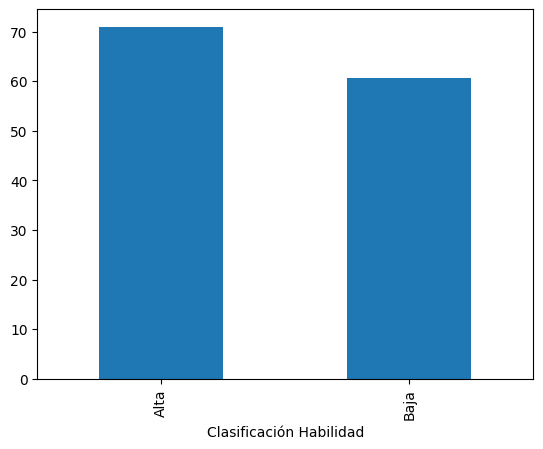

In [16]:
fifa.groupby('Clasificación Habilidad').Overall.mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Clasificación Habilidad'>

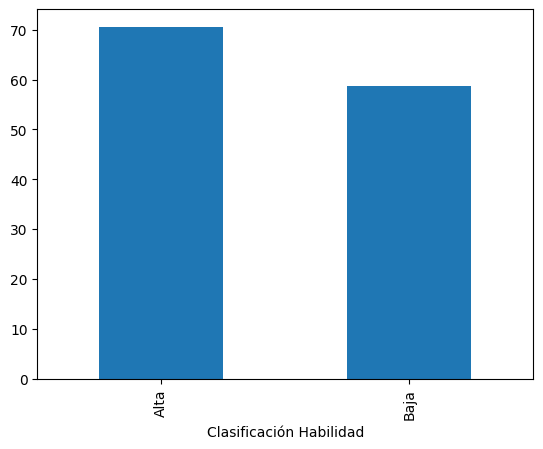

In [19]:
fifa_gk.groupby('Clasificación Habilidad').Overall.mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [20]:
conteo_habilidad = fifa['Clasificación Habilidad'].value_counts()
print(conteo_habilidad)


Clasificación Habilidad
Alta    8507
Baja    7860
Name: count, dtype: int64


In [21]:
conteo_habilidad_gk = fifa_gk['Clasificación Habilidad'].value_counts()
print(conteo_habilidad_gk)

Clasificación Habilidad
Baja    1058
Alta     995
Name: count, dtype: int64


In [22]:
porcentaje_habilidad_gk = conteo_habilidad / len(fifa) * 100
print(porcentaje_habilidad_gk)


Clasificación Habilidad
Alta    51.976538
Baja    48.023462
Name: count, dtype: float64


In [23]:
porcentaje_habilidad = conteo_habilidad / len(fifa) * 100
print(porcentaje_habilidad)

Clasificación Habilidad
Alta    51.976538
Baja    48.023462
Name: count, dtype: float64


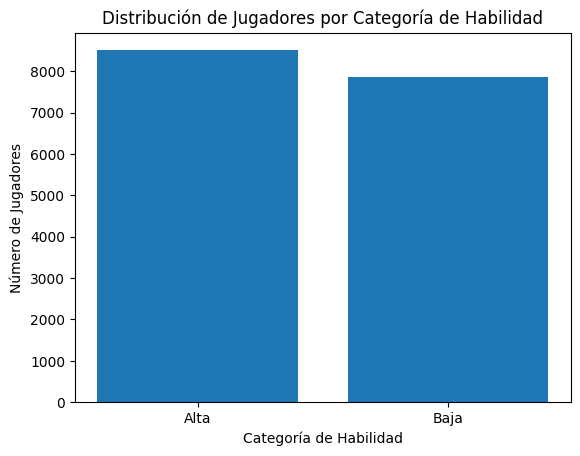

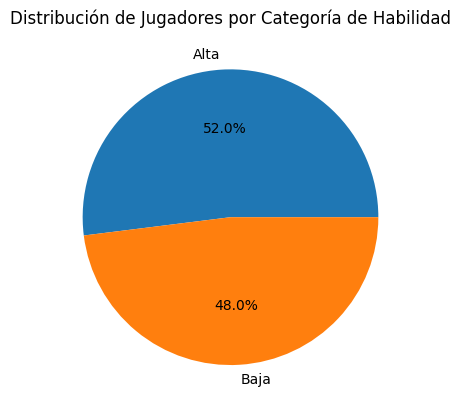

In [24]:
# Gráfico de barras
plt.bar(conteo_habilidad.index, conteo_habilidad)
plt.xlabel('Categoría de Habilidad')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Jugadores por Categoría de Habilidad')
plt.show()

# Diagrama circular
plt.pie(porcentaje_habilidad, labels=porcentaje_habilidad.index, autopct='%1.1f%%')
plt.title('Distribución de Jugadores por Categoría de Habilidad')
plt.show()


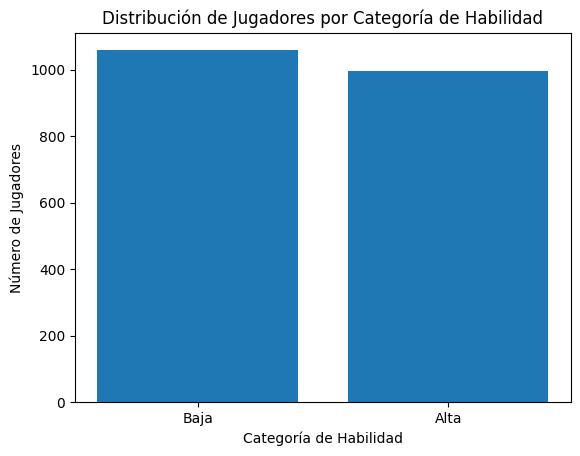

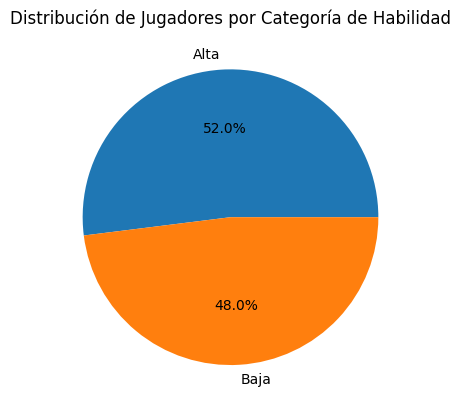

In [25]:
# Gráfico de barras
plt.bar(conteo_habilidad_gk.index, conteo_habilidad_gk)
plt.xlabel('Categoría de Habilidad')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Jugadores por Categoría de Habilidad')
plt.show()

# Diagrama circular
plt.pie(porcentaje_habilidad_gk, labels=porcentaje_habilidad_gk.index, autopct='%1.1f%%')
plt.title('Distribución de Jugadores por Categoría de Habilidad')
plt.show()

In [30]:
# save to csv
fifa.to_csv('src/data/processed/fifa_clasificacion_habilidad.csv', index=False)

In [31]:
fifa_gk.to_csv('src/data/processed/fifa_gk_clasificacion_habilidad.csv', index=False)